# Data Cleaning Process: Before EDA

This notebook outlines the complete data cleaning process before conducting an Exploratory Data Analysis (EDA). The following steps aim to ensure the dataset is consistent, accurate, and prepared for analysis or modeling.

## Installing Essential Libraries

To perform data analysis and visualization effectively, we need to install some essential Python libraries. 
The following command installs the required libraries:

Libraries Installed:
1)pandas: For data manipulation and analysis, especially with tabular data in data frames.

2)numpy: For scientific computing with support for multi-dimensional arrays and matrices.
    
3)matplotlib: For creating static, interactive, and animated visualizations.

4)seaborn: A high-level interface built on top of matplotlib for attractive statistical graphics.

5)plotly: A library for creating interactive, publication-quality graphs online and offline.

6)wordcloud: For generating word cloud visualizations, particularly useful for text-based data.
    
7)scikit-learn: A popular machine learning library that provides simple and efficient tools for data mining and analysis.

```bash
!pip install pandas numpy matplotlib seaborn plotly wordcloud scikit-learn


In [12]:
!pip install pandas numpy matplotlib seaborn plotly wordcloud scikit-learn

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/jupyter-1.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## Importing Essential Data Manipulation and Visualization Libraries

We import a range of libraries to handle data manipulation, numerical operations, and visualizations:

1 pandas (pd): For data manipulation and analysis, especially useful for handling tabular data structures like DataFrame.
    
2 numpy (np): A core library for numerical operations, providing support for multi-dimensional arrays and matrices, along with mathematical functions.

3 matplotlib.pyplot (plt): A library for creating a wide variety of static, interactive, and animated visualizations.

4 seaborn (sns): A high-level visualization library built on top of matplotlib that simplifies creating attractive statistical plots.

5 plotly.express (px): A high-level interface for creating interactive and publication-quality graphs.

6 wordcloud (WordCloud, STOPWORDS, ImageColorGenerator):
WordCloud for generating word clouds from textual data, where word size reflects frequency or importance.
STOPWORDS to filter out common words (e.g., “the”, “and”) that are typically not meaningful.
ImageColorGenerator to create color schemes for word clouds based on an image, enhancing visual appeal.

7 train_test_split: A function that splits datasets into training and testing subsets to validate models and avoid overfitting.

8 PassiveAggressiveRegressor: A linear model that performs well in online learning scenarios by updating itself iteratively with each new training instance.

9 plt.style.use('ggplot'): Sets the plot style to ‘ggplot’, inspired by the popular R library ggplot2, offering a clean look with a red grid background.

10 sns.set(style="whitegrid"): Configures Seaborn’s plot style with a white background and grid lines, making plots clearer and easier to interpret.                                     


In [13]:
# Importing essential data manipulation and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importing machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

# Optional: Adjusting default plot styles for better visual aesthetics
plt.style.use('ggplot')
sns.set(style="whitegrid")

## Loading the Dataset

The following code loads the dataset into a pandas `DataFrame` and displays the first few rows to give an overview of its structure:

1 file_path: Specifies the location and name of the dataset file. You can change this if the file is in a different location or has a different name.

2 pd.read_csv(): Reads the CSV file into a pandas DataFrame. The parameter encoding='ISO-8859-1' is used to handle special characters that may be present in the dataset. 
This encoding is commonly used for European languages.
    
3 df.head(): Displays the first five rows of the DataFrame to help you quickly understand the dataset's structure and contents, including column names and data types.


In [14]:
# Load the dataset (assuming the file is named 'Instagram data.csv')
file_path = 'Instagram data.csv'  # Change to your file path if necessary
df = pd.read_csv(file_path, encoding='ISO-8859-1')
# Display the first few rows to understand the dataset structure
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


## Step 1: Handling Missing Values

In this step, we will identify and handle any missing values present in the dataset. Missing values can disrupt analysis and introduce bias.
We check the dataset for missing values and either drop or fill them based on their impact on the analysis.

In [15]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column before cleaning:\n", missing_values)

# Optionally drop rows/columns with excessive missing values or fill with mean/median/mode
df = df.dropna()  # Dropping rows with missing values
# Alternatively, for critical columns, fill missing values with mean or median
# df['Column_Name'] = df['Column_Name'].fillna(df['Column_Name'].mean())

# Verify missing values after cleaning
missing_values_after = df.isnull().sum()
print("Missing values in each column after cleaning:\n", missing_values_after)


Missing values in each column before cleaning:
 Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64
Missing values in each column after cleaning:
 Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64


## Step 2: Removing Duplicates

In this step, we will identify and remove duplicate rows in the dataset. Duplicates can distort statistical results and introduce redundancy.

In [16]:

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_rows}")

# Remove duplicate rows if any
df = df.drop_duplicates()
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows found: 17
Number of duplicate rows after removal: 0


## Step 3: Detecting and Removing Outliers

Outliers can significantly impact the mean, standard deviation, and correlations in the dataset. Here, we will detect and remove outliers using the Interquartile Range (IQR) method, which identifies data points that fall outside 1.5 times the IQR.

In [17]:

# Define a function to detect and remove outliers using the IQR method
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Apply the outlier removal function on key numerical columns
for col in ['Likes', 'Impressions', 'Comments', 'Shares']:
    df = remove_outliers(df, col)

# Verify data description after removing outliers
print("Data description after removing outliers:")
print(df.describe())


Data description after removing outliers:
       Impressions    From Home  From Hashtags  From Explore   From Other  \
count    85.000000    85.000000      85.000000     85.000000    85.000000   
mean   4355.541176  2170.611765    1476.870588    472.600000   145.082353   
std    1425.900873   509.681252    1119.933457    504.502541   196.581572   
min    1941.000000  1133.000000     116.000000      0.000000     9.000000   
25%    3388.000000  1807.000000     694.000000    166.000000    36.000000   
50%    4082.000000  2125.000000    1214.000000    318.000000    72.000000   
75%    5072.000000  2517.000000    1938.000000    562.000000   154.000000   
max    8001.000000  3813.000000    5055.000000   2266.000000  1115.000000   

            Saves   Comments     Shares       Likes  Profile Visits  \
count   85.000000  85.000000  85.000000   85.000000       85.000000   
mean   118.364706   5.964706   6.929412  150.682353       28.070588   
std     83.230009   2.753556   5.550179   49.523735

## Step 4: Text Data Cleaning

For text-based columns such as 'Caption' and 'Hashtags', it is important to standardize the text and remove any special characters or noise. This step helps in ensuring consistency when conducting textual analysis.

In [18]:

# Standardizing text data in the 'Caption' column
df['Caption'] = df['Caption'].str.lower().str.replace('[^a-zA-Z0-9\s]', '', regex=True).str.strip()

# Standardizing hashtags by removing special characters and lowering case
df['Hashtags'] = df['Hashtags'].str.lower().str.replace('[^a-zA-Z0-9#\s]', '', regex=True).str.strip()

# Display the first few rows to verify cleaning
df[['Caption', 'Hashtags']].head()


,Caption,Hashtags
0,here are some of the most important data visua...,#finance #money #business #investing #investme...
1,here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,heres how you can write a python program to de...,#python #pythonprogramming #pythonprojects #py...
4,plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


## Step 5: Feature Engineering

In this step, we will derive additional features from the existing data to enrich our analysis. For example, we will calculate the engagement rate and count the number of hashtags per post.

In [19]:

# Calculate the engagement rate as a new feature
df['Engagement Rate'] = (df['Likes'] + df['Comments'] + df['Shares']) / df['Impressions']

# Calculate the number of hashtags in each post
df['Num Hashtags'] = df['Hashtags'].apply(lambda x: len(str(x).split('#')) - 1)

# Display the first few rows to confirm the new features
df[['Engagement Rate', 'Num Hashtags']].head()


,Engagement Rate,Num Hashtags
0,0.044898,22
1,0.045421,18
2,0.035563,18
3,0.050795,11
4,0.052423,29


## Step 6: Transforming Data Types

Ensuring correct data types is crucial for accurate analysis. In this step, we will convert numerical and categorical columns as necessary, and verify the transformations.

In [20]:

# Converting numeric columns to integer types if required
df['Likes'] = df['Likes'].astype(int)
df['Impressions'] = df['Impressions'].astype(int)

# If there are any categorical columns that need conversion, we can use:
# df['Category_Column'] = df['Category_Column'].astype('category')

# Verify data types after transformation
print("Data types after transformation:\n", df.dtypes)


Data types after transformation:
 Impressions          int64
From Home            int64
From Hashtags        int64
From Explore         int64
From Other           int64
Saves                int64
Comments             int64
Shares               int64
Likes                int64
Profile Visits       int64
Follows              int64
Caption             object
Hashtags            object
Engagement Rate    float64
Num Hashtags         int64
dtype: object


## Step 7: Final Cleaning Checks

In this final step, we will conduct integrity checks on key columns, review ranges, and perform a final inspection to ensure the dataset is ready for analysis.

In [21]:

# Checking for any remaining issues such as negative values or unrealistic zeros in key columns
# For example, ensure 'Likes' and 'Impressions' are not negative
if (df[['Likes', 'Impressions']] < 0).any().any():
    print("Warning: Negative values detected in 'Likes' or 'Impressions'. Please inspect manually.")

# Display final data description to verify the dataset
print("Final data description:")
print(df.describe())

# Save the cleaned dataset
cleaned_file_path = 'cleaned_instagram_data.csv'
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as {cleaned_file_path}")


Final data description:
       Impressions    From Home  From Hashtags  From Explore   From Other  \
count    85.000000    85.000000      85.000000     85.000000    85.000000   
mean   4355.541176  2170.611765    1476.870588    472.600000   145.082353   
std    1425.900873   509.681252    1119.933457    504.502541   196.581572   
min    1941.000000  1133.000000     116.000000      0.000000     9.000000   
25%    3388.000000  1807.000000     694.000000    166.000000    36.000000   
50%    4082.000000  2125.000000    1214.000000    318.000000    72.000000   
75%    5072.000000  2517.000000    1938.000000    562.000000   154.000000   
max    8001.000000  3813.000000    5055.000000   2266.000000  1115.000000   

            Saves   Comments     Shares       Likes  Profile Visits  \
count   85.000000  85.000000  85.000000   85.000000       85.000000   
mean   118.364706   5.964706   6.929412  150.682353       28.070588   
std     83.230009   2.753556   5.550179   49.523735       22.275220  

# Data Visualization and Analysis

## 1. Performance Analysis:
In this performance analysis, we assess Instagram posts based on several key metrics:

**Impressions:** Total views of the content.

**Saves:** The number of times the posts were saved.

**Comments:** The quantity of user interactions through comments.

**Shares:** How often the content was shared.

**Likes:** The total number of “likes” received.

Additionally, we calculate the Engagement Rate as (Likes + Comments + Shares) divided by Impressions. 
This rate provides a measure of user interaction normalized by the number of views, helping gauge content quality and impact on your audience.
Analyzing these metrics will aid in refining your content strategy for long-term Instagram success.

In [26]:
import pandas as pd

# Load the dataset
Data = pd.read_csv('cleaned_instagram_data.csv')

# Calculate total metrics
Total_impressions = Data['Impressions'].sum()
Total_saves = Data['Saves'].sum()
Total_comments = Data['Comments'].sum()
Total_shares = Data['Shares'].sum()
Total_likes = Data['Likes'].sum()

# Calculate Engagement Rate
Engagement_Rate = (Total_likes + Total_comments + Total_saves + Total_shares) / Total_impressions
print("Engagement Rate is calculated as:", Engagement_Rate)


Engagement Rate is calculated as: 0.06473160625680337


## Conclusion
Based on the engagement rate of 6.47%, here are some conclusions and considerations:

**Moderate Engagement:**
-A 6.47% engagement rate is generally considered good, depending on the industry and typical engagement rates for similar accounts. 
-This indicates that a fair portion of viewers are interacting with the content in some way (likes, comments, saves, or shares).
-For context, average engagement rates on Instagram can vary widely by industry, with benchmarks ranging from around 1% for larger accounts to 5-6% for more niche or personal accounts. 
-A higher engagement rate suggests that the content resonates well with the audience.

**Content Effectiveness:**    
-This engagement rate suggests that your posts are not only reaching people but also encouraging them to interact.
-It implies that the content strategy (in terms of visuals, captions, timing, and hashtags) is effective at prompting responses from viewers.

In [27]:
# Assuming that the variables have already been calculated as follows:
# Total_impressions, Total_saves, Total_comments, Total_shares, Total_likes, and Engagement_Rate

print(f"Total Impressions: {Total_impressions}")
print(f"Total Saves: {Total_saves}")
print(f"Total Comments: {Total_comments}")
print(f"Total Shares: {Total_shares}")
print(f"Total Likes: {Total_likes}")
print(f"Engagement Rate: {Engagement_Rate:.2%}")


Total Impressions: 370221
Total Saves: 10061
Total Comments: 507
Total Shares: 589
Total Likes: 12808
Engagement Rate: 6.47%


•**Total Impressions:**
370221 views, indicating the reach of the posts.
    
•**Total Saves:** 10,061 saves, showing the value of the content.
    
•**Total Comments:** 507 comments, reflecting engagement and interaction.
    
•**Total Shares:** 589 shares, extending your content’s reach.
    
•**Total Likes:** 12808 likes, representing approval and appreciation.
    
•**Engagement Rate:** 6.47%, indicating that roughly 6.47% of viewers engaged with the content. A higher rate signifies more engagement and interaction with the audience.

## 2. Source Analysis:
This analysis aims to discern the primary avenues through which your content is discovered on Instagram, categorized as follows:

**From Home:** Content viewed by your followers in their feeds.

**From Hashtags:** Content discovered via hashtag usage.

**From Explore:** Content featured on Instagram’s Explore page.

**From Other:** Content discovered through unclassified sources.

**This analysis facilitates a focused content strategy adjustment based on the most engaging sources, contributing to long-term Instagram success.**

## Beginning by analyzing the distribution of impressions received from followers’ feeds (From Home). 
This analysis will provide insights into how content is performing in terms of organic reach to existing audience.

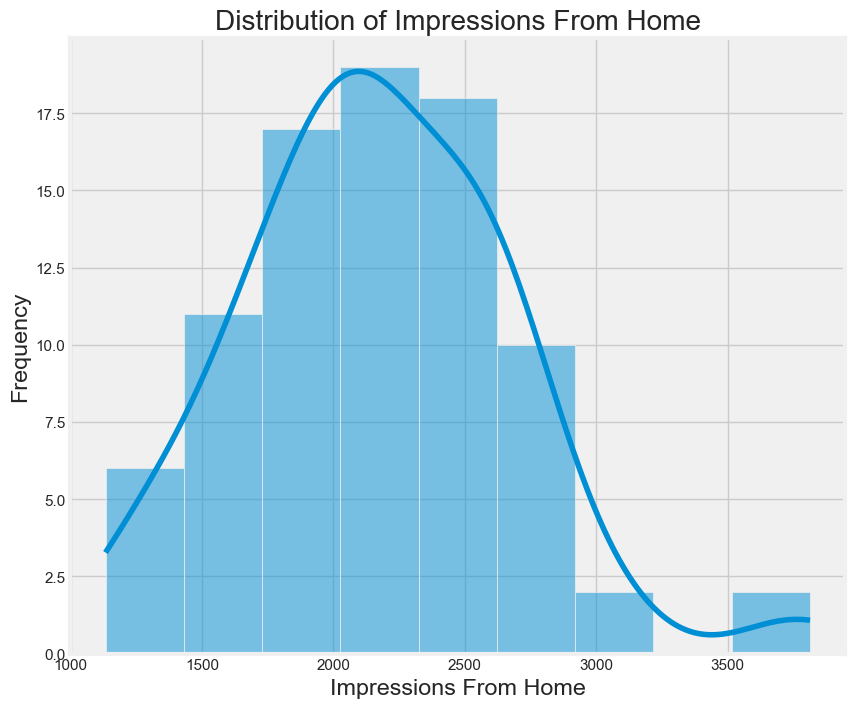

In [36]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")

# Use histplot for a histogram, or kdeplot for a kernel density estimate
sns.histplot(Data['From Home'], kde=True)  # Adds KDE on top of histogram
plt.xlabel("Impressions From Home")
plt.ylabel("Frequency")
plt.show()


## Conclusion:
Interpretation:

1 **Skewed Distribution:**
 The distribution is right-skewed (tail to the right), meaning most posts have impressions "From Home" clustered on the lower end, with fewer posts reaching higher impression counts.

2 **Common Range:**
The majority of impressions "From Home" fall between roughly 1500 and 2500. 
This indicates that most posts receive a similar level of reach from this source.

3 **Fewer High-Impression Posts:**
Only a small number of posts achieved impressions above 3000, suggesting that reaching higher impressions from the "Home" source may require specific strategies or content types.

## Distribution of impressions originating from hashtags:
This analysis will provide insights into how posts’ impressions are distributed across different hashtags. 
It can help us understand which hashtags are most effective in increasing the content’s visibility and reach.
By focusing on the hashtags that generate the most impressions, we can optimize hashtag strategy to enhance the reach of Instagram posts.

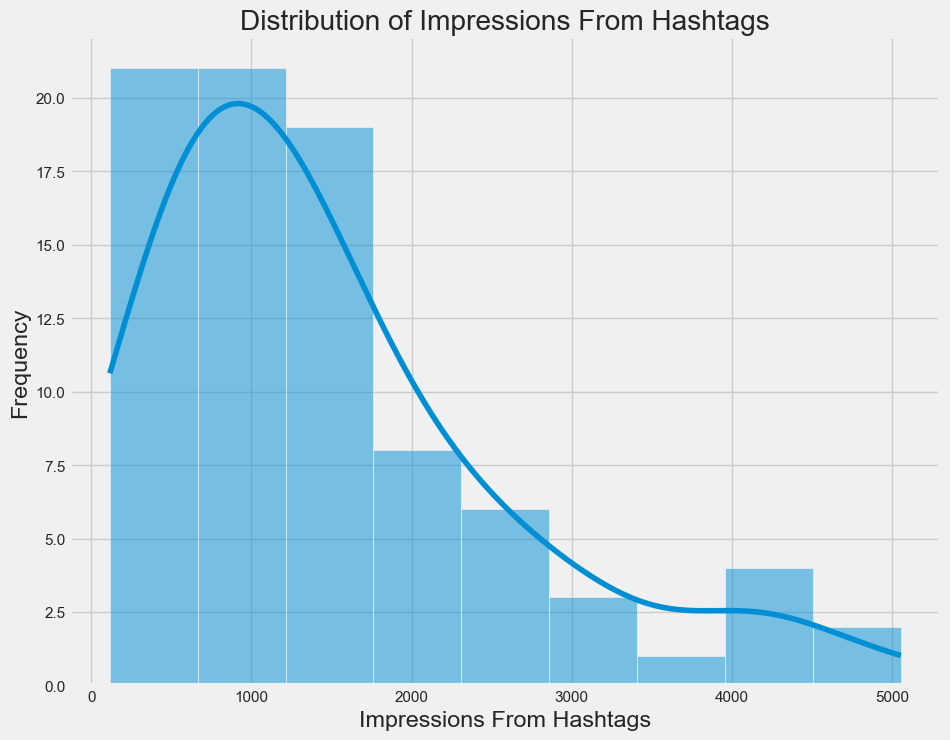

In [37]:

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Hashtags")

# Plot the distribution of impressions from hashtags
sns.histplot(Data['From Hashtags'], kde=True)  # Adds KDE on top of histogram
plt.xlabel("Impressions From Hashtags")
plt.ylabel("Frequency")
plt.show()


-**Interpretation**

1 **Skewed Distribution:**
Like the "From Home" impressions, the "From Hashtags" impressions are heavily right-skewed. 
This suggests that most posts receive a relatively low number of impressions from hashtags, with a few posts achieving much higher impressions.

2 **Common Range:**
The bulk of impressions from hashtags falls between 0 and 2000, with the highest frequency around the 500–1500 range.
This indicates that most posts gain a limited reach from hashtags.

3 **Fewer High-Impression Posts:**
Only a small number of posts achieved impressions above 3000. Posts with these high impressions from hashtags might have used particularly effective or trending hashtags.

## Distribution of impressions that have been received from the Explore section of Instagram. 
This analysis will provide insights into how the content is being discovered and featured on the Explore page, potentially reaching a wider and more diverse audience.

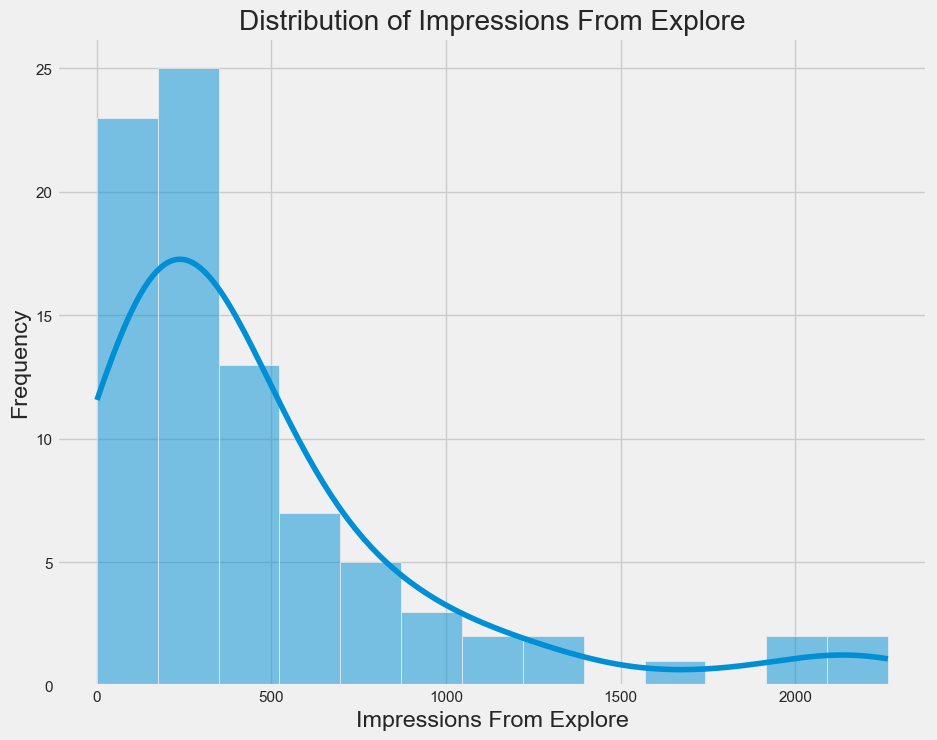

In [39]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")

# Plot the distribution of impressions from explore
sns.histplot(Data['From Explore'], kde=True)  # Adds KDE on top of histogram
plt.xlabel("Impressions From Explore")
plt.ylabel("Frequency")
plt.show()


-**Interpretation**

1 **Highly Skewed Distribution:**

This distribution is even more right-skewed compared to previous sources ("From Home" and "From Hashtags").
Most posts receive fewer than 500 impressions from the Explore page, indicating that it may be challenging to achieve high reach through this source.

2 **Common Range:**
The majority of posts get fewer than 500 impressions from Explore, with a significant drop in frequency as impressions increase. 
This suggests that the Explore page provides reach to a select number of posts.
    
3 **Low Volume of High-Impression Posts:**
Very few posts achieve impressions above 1000 from the Explore page.
Posts that reach this level may have specific characteristics that make them more likely to appear in the Explore feed, such as higher engagement or appealing visuals.

## Distribution of impressions originating from sources categorized as “Other” on Instagram. 

This analysis will provide insights into the performance of the content in channels outside the primary categories, enabling informed adjustments to your content strategy.



plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Other Sources")

# Plot the distribution of impressions from other sources
sns.histplot(Data['From Other'], kde=True)  # Adds KDE on top of histogram
plt.xlabel("Impressions From Other")
plt.ylabel("Frequency")
plt.show()


-**Interpretation**

1 **Highly Concentrated at Low Impressions:**
The majority of impressions from "Other" sources are low, with a large number of posts receiving fewer than 100 impressions. 
This suggests that the "Other" category contributes minimally to post reach for most posts.

2 **Sharp Decline:**
There’s a steep drop in frequency as impressions increase, with very few posts reaching higher impression counts (above 200). 
This indicates that high impressions from "Other" sources are rare.

3 **Possible Outliers:**
A few posts reach impressions up to or above 1000 from "Other" sources, but these are outliers.
Analyzing these posts may provide insights into what drives rare, high impressions from miscellaneous sources.

## Examining the distribution of impressions received from various sources on Instagram and calculate the percentage each source contributes to overall impressions. 
This analysis will provide insights into where the content is primarily discovered and can help to tailor the content strategy accordingly.

In [45]:
# Summing up impressions from different sources
Home = Data["From Home"].sum()
Hashtags = Data["From Hashtags"].sum()
Explore = Data["From Explore"].sum()
Other = Data["From Other"].sum()

# Labels and values for the pie chart
labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [Home, Hashtags, Explore, Other]

# Create a pie chart with a hole to make it a donut chart
fig = px.pie(values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', 
             hole=0.5)

# Show the figure
fig.show()


## Conclusion

-**From Home (50.9%):**
The majority of impressions come from the "Home" source, accounting for just over half of the total impressions. 
This suggests that most users are engaging with posts directly from their feeds, highlighting the importance of reaching followers effectively.

-**From Hashtags (34.6%):**
Hashtags contribute a substantial portion of impressions, indicating that they are an effective tool for extending reach to new or non-following audiences. 
This suggests that optimizing hashtag strategy could further increase visibility.

-**From Explore (11.1%):**
Impressions from the Explore page make up a smaller portion, suggesting that while the Explore page does contribute to reach, it is less significant compared to Home and Hashtags.

-**Other (3.4%):**
Impressions categorized under "Other" are the smallest contributor, with limited impact on overall reach. 
This might include miscellaneous sources that don’t provide consistent impressions.


## 3. User Behaviour Analysis

This analysis observes three essential aspects of user engagement on the Instagram account:

**Profile Visits:** How often users check your profile.

**Follows:** The number of users following your account.
   
**Likes:** The total likes on your posts.

**Monitoring these metrics provides insights to adapt the content strategy for long-term success on Instagram.**

Total Profile Visits: 2386
Total Follows: 862
Total Likes: 12808


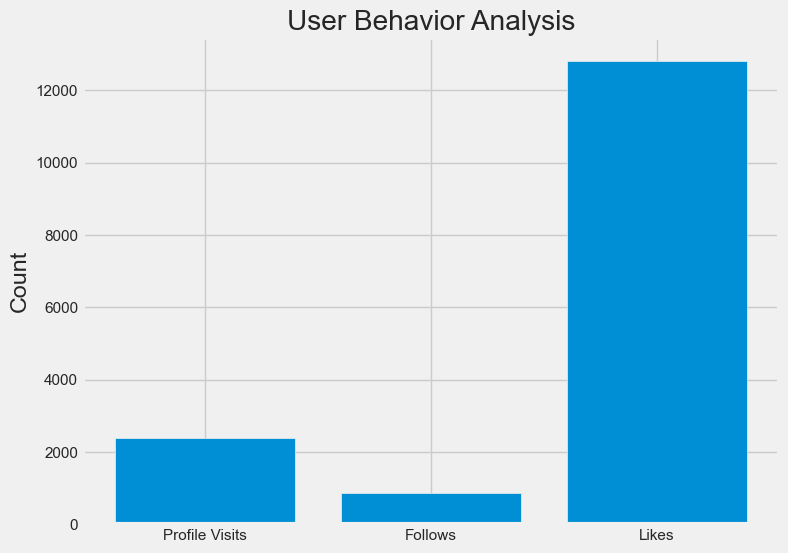

In [46]:
# Calculate total counts for profile visits, follows, and likes
Total_profile_visits = Data['Profile Visits'].sum()
Total_follows = Data['Follows'].sum()
Total_likes = Data['Likes'].sum()

# Print the total counts
print(f'Total Profile Visits: {Total_profile_visits}')
print(f'Total Follows: {Total_follows}')
print(f'Total Likes: {Total_likes}')

# Create a bar chart to visualize user behavior
plt.figure(figsize=(8, 6))
plt.bar(['Profile Visits', 'Follows', 'Likes'], [Total_profile_visits, Total_follows, Total_likes])
plt.title('User Behavior Analysis')
plt.ylabel('Count')
plt.show()


### Analysis

#### Profile Visit to Follow Ratio:
- The ratio of follows to profile visits is about  **862/2386 ≈ 0.36** or **36%**. 
This means that roughly 36% of users who visit your profile end up following you.
This is a fairly good conversion rate, indicating that a significant portion of people who view your profile find your content or brand appealing enough to follow.

- **Recommendation**: To improve this rate, ensure your profile bio is clear, compelling, and showcases the value of following you. 
Highlighting engaging content, using story highlights, and having a clear call-to-action in the bio can further increase conversions.

#### Engagement Through Likes:
- With **12,808 likes**, this metric indicates good engagement with individual posts. 
Likes generally represent passive engagement, where users appreciate content but may not take further action (e.g., commenting or sharing).

- **Recommendation**: To encourage deeper engagement (comments, shares), consider using calls-to-action in captions. Questions, opinion-based prompts, or even encouraging users to tag friends can foster more active interactions.

#### Profile Visits Relative to Likes:
- Profile visits are roughly **18.6%** of the total likes  **2386/12808 ≈ 0.186**, suggesting that while users are engaging with posts, a smaller subset takes the extra step of visiting the profile.

- **Recommendation**: You could consider cross-promoting your profile in individual post captions or using story links that lead back to the profile for more information. This can help convert post engagement into profile engagement.

### Overall Recommendations
- **Content Quality and Consistency**: Continue posting high-quality, engaging content to sustain and grow likes.

- **Conversion-Focused Profile**: Enhance profile elements to improve the conversion from visits to follows, as this ultimately contributes to audience growth.

- **Encourage Active Engagement**: Experiment with captions that encourage comments and shares to drive more active participation.

This analysis provides a snapshot of user behavior related to profile engagement and post interaction. Let me know if you’d like deeper insights on any specific metric!


## 4. Analyzing Content:
To gain insights into the nature of your Instagram content, we will analyze the dataset’s caption and hashtags columns. 
This analysis will provide an overview of the topics and themes you typically feature in your Instagram posts.

To visualize the most frequently used words in your captions, we will create a word cloud. 
This word cloud will highlight the prominent words or phrases that appear in your captions, offering a visual representation of the prevalent themes and content in your Instagram posts

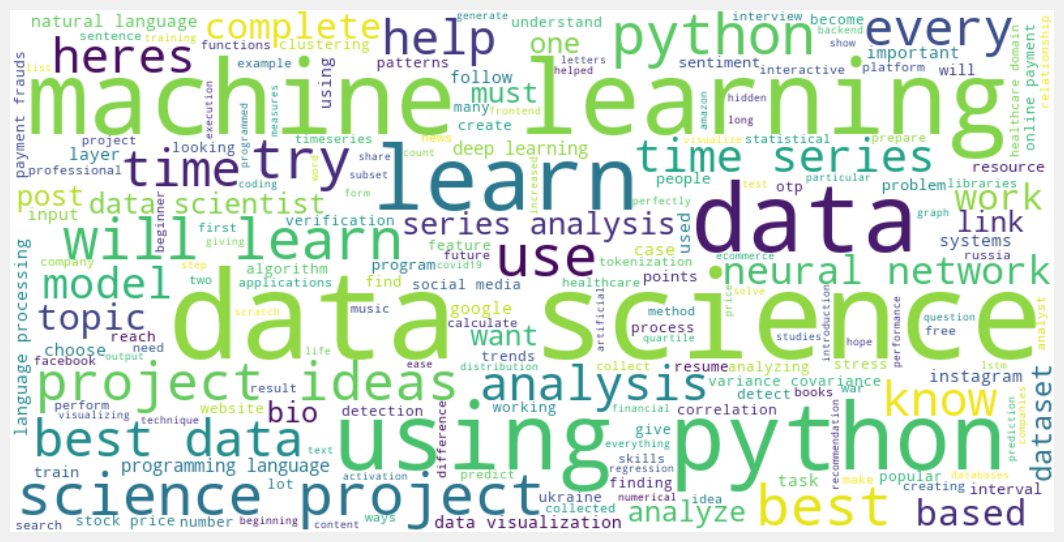

In [49]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Combine all captions into a single string
words = " ".join(i for i in Data['Caption'].dropna())

# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wc = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(words)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()



## Similarly, creating a word cloud from the hashtags column
 It will allow us to identify the most frequently used hashtags in your Instagram posts. 
This visual representation will give us insights into the popular hashtags associated with your content

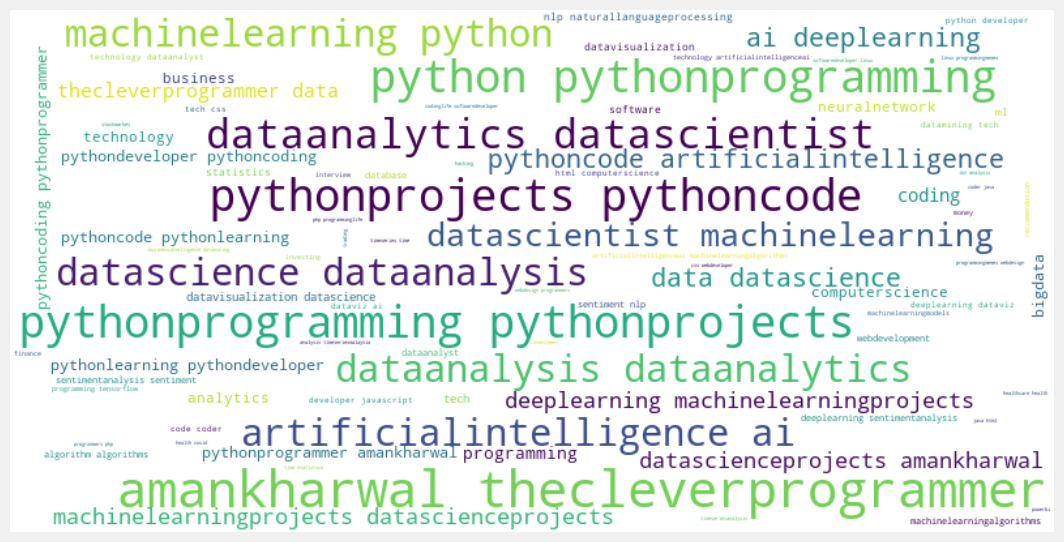

In [50]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all hashtags into a single string
text = " ".join(i for i in Data['Hashtags'].dropna())

# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

# Display the word cloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## 5. Analyzing Relationships:

In this analysis, we will delve into the relationships between various factors to identify the most influential elements affecting the Instagram reach. 
This analysis will provide valuable insights into the factors that play a crucial role in determining the reach of the Instagram content. 
Furthermore, it can shed light on how the Instagram algorithm functions.


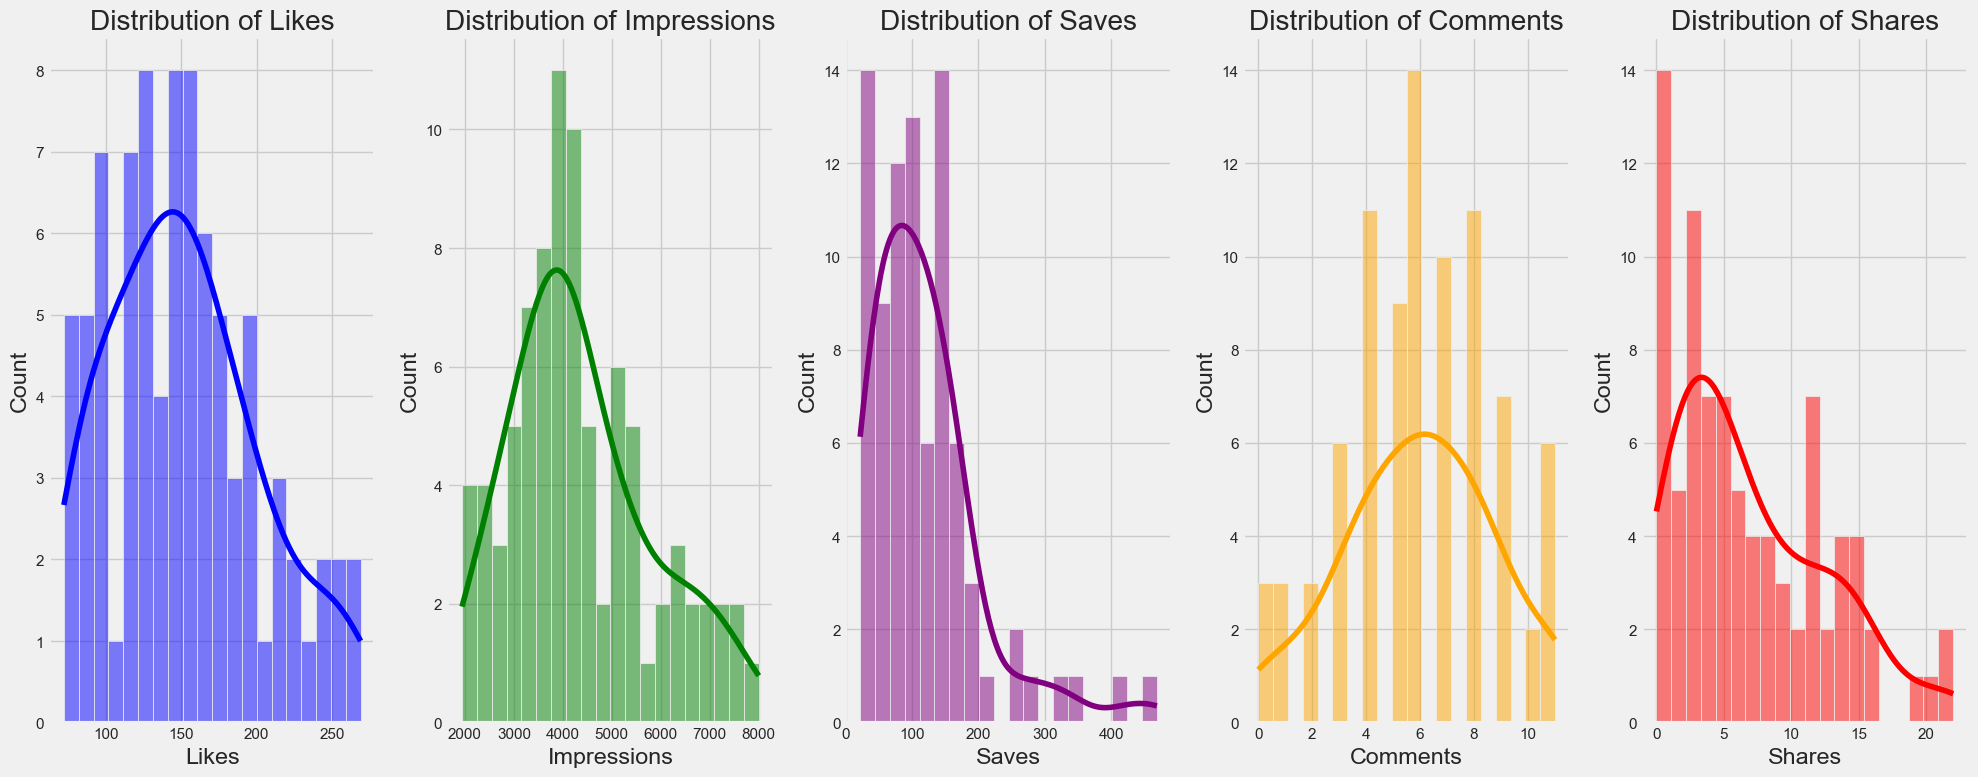

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of key metrics
plt.figure(figsize=(20, 8))

# Plot distribution of 'Likes'
plt.subplot(1, 5, 1)
sns.histplot(df['Likes'], bins=20, kde=True, color='blue')
plt.title('Distribution of Likes')

# Plot distribution of 'Impressions'
plt.subplot(1, 5, 2)
sns.histplot(df['Impressions'], bins=20, kde=True, color='green')
plt.title('Distribution of Impressions')

# Plot distribution of 'Saves'
plt.subplot(1, 5, 3)
sns.histplot(df['Saves'], bins=20, kde=True, color='purple')
plt.title('Distribution of Saves')

# Plot distribution of 'Comments'
plt.subplot(1, 5, 4)
sns.histplot(df['Comments'], bins=20, kde=True, color='orange')
plt.title('Distribution of Comments')

# Plot distribution of 'Shares'
plt.subplot(1, 5, 5)
sns.histplot(df['Shares'], bins=20, kde=True, color='red')
plt.title('Distribution of Shares')

plt.tight_layout()
plt.show()


we will explore the **relationship between the number of likes and the number of impressions on your Instagram posts.** 
Understanding this relationship will help us discern how user engagement, as represented by likes, correlates with the visibility and reach of the content, as represented by impressions.

In [52]:
import plotly.express as px

# Create the scatter plot with a trendline
figure = px.scatter(
    data_frame=Data, 
    x="Impressions", 
    y="Likes", 
    size="Likes", 
    trendline="ols", 
    title="Relationship Between Likes and Impressions"
)

# Show the plot
figure.show()


1 **Positive Correlation**:
There is an upward trend in the data, indicating a positive correlation between impressions and likes. 
This means that, in general, posts with higher impressions tend to receive more likes.
The trendline (in blue) confirms this positive relationship, showing that as impressions increase, the number of likes also tends to increase.

2 **Variation in Like Counts**:
While there’s a general upward trend, there is some variation in like counts for posts with similar impressions. 
For example, some posts with around 4000 impressions receive between 100 and 200 likes, while others receive fewer than 100.
This variation suggests that impressions alone do not determine the number of likes a post receives.
Other factors (such as content type, quality, timing, or audience interest) likely influence engagement.

3 **Point Size**:
The size of each point represents the number of likes. Larger points indicate posts with higher like counts. 
    This visual cue highlights posts with exceptionally high engagement relative to impressions.

Analyzing the **relationship between the number of comments and the number of impressions** on your Instagram posts allows us to understand how user interactions, in the form of comments, influence the reach and visibility of your content. 
This analysis will provide insights into whether there is a correlation between these two factors and how user engagement through comments impacts your Instagram reach.

In [54]:
# Create the scatter plot with a trendline
figure = px.scatter(
    data_frame=Data, 
    x="Impressions", 
    y="Comments", 
    size="Comments", 
    trendline="ols", 
    title="Relationship Between Comments and Impressions"
)

# Show the plot
figure.show()


**Slight Positive Trend:**
The trendline shows a slight positive slope, suggesting a weak positive correlation between impressions and comments.
This implies that as impressions increase, the number of comments tends to increase slightly, but the effect is not very strong.
The weak correlation might indicate that factors other than impressions (such as post content, caption prompts, or post type) play a larger role in driving comments.

**Variability in Comments:**
There is notable variation in the number of comments for posts with similar impressions. 
For example, posts with around 4000 impressions show a wide range of comment counts, from as low as 2 to over 10.
This variation suggests that impressions alone do not consistently predict comment levels.
Content quality, caption prompts, or specific engagement strategies may significantly influence the number of comments.

**Point Size:**
Each point’s size represents the number of comments, with larger points indicating posts with more comments. 
This helps highlight posts that have received relatively higher engagement in terms of comments.

Analyzing the **relationship between the number of saves and the number of impressions** on your Instagram posts provides insights into how user actions, specifically saving your posts, influence the reach and visibility of your content. 
This analysis will reveal whether there is a correlation between these two factors and how user engagement through saving posts affects the reach of your Instagram content.

In [55]:
# Create the scatter plot with a trendline
figure = px.scatter(
    data_frame=Data, 
    x="Impressions", 
    y="Saves", 
    size="Saves", 
    trendline="ols", 
    title="Relationship Between Saves and Impressions"
)

# Show the plot
figure.show()



**Positive Correlation:**
The trendline has a slight upward slope, suggesting a positive correlation between impressions and saves.
This means that, generally, posts with more impressions tend to receive more saves, though the correlation is not particularly strong.
This indicates that while impressions may contribute to the likelihood of a post being saved, other factors might also play a role in determining whether a post is saved.

**Variability in Saves:**
There is noticeable variation in the number of saves for posts with similar impressions. 
For instance, posts with around 4000–5000 impressions show a range of save counts from low to high.
This variability suggests that content characteristics (such as value, relevance, or inspiration) may impact saves more significantly than impressions alone.
Posts that offer something valuable, like tips, inspiration, or information, might be saved more often.

**Point Size:**
The size of each point represents the number of saves, with larger points indicating posts with a higher number of saves. 
This helps to quickly identify which posts are saved more frequently.

Analyzing the **relationship between the number of shares and the number of impressions** on your Instagram posts allows us to understand how sharing behavior impacts the reach and visibility of your content.
This analysis will reveal whether there is a correlation between these two factors and how user engagement through shares influences the reach of your Instagram posts.

In [56]:
# Create the scatter plot with a trendline
figure = px.scatter(
    data_frame=Data, 
    x="Impressions", 
    y="Shares", 
    size="Shares", 
    trendline="ols", 
    title="Relationship Between Shares and Impressions"
)

# Show the plot
figure.show()



**Weak Positive Correlation:**
The trendline has a slight upward slope, suggesting a weak positive correlation between impressions and shares. 
This means that as impressions increase, there is a slight tendency for the number of shares to increase, but the relationship is not very strong.
The weak correlation indicates that impressions alone may not strongly influence whether a post is shared. 
    Other factors, such as content type, relevance, and emotional appeal, may play a larger role in encouraging users to share a post.

**Variation in Shares:**
There is significant variation in the number of shares for posts with similar impressions. 
For example, posts with around 4000–5000 impressions show a wide range of share counts, from very few shares to over 10.
This variability suggests that impressions alone do not consistently predict shares.
Posts that are informative, entertaining, or thought-provoking are more likely to be shared, regardless of impression count.

**Point Size:**
Each point’s size represents the number of shares, with larger points indicating posts with higher shares. 
This helps quickly identify which posts have been shared more frequently, making it easy to spot outliers.

Analyzing the **relationship between the number of saves and the number of impressions** on your Instagram posts provides insights into how user actions, specifically saving your posts, influence the reach and visibility of your content.
This analysis will reveal whether there is a correlation between these two factors and how user engagement through saving posts affects the reach of your Instagram content.

In [57]:
# Create the scatter plot with a trendline
figure = px.scatter(
    data_frame=Data, 
    x="Impressions", 
    y="Saves", 
    size="Saves", 
    trendline="ols", 
    title="Relationship Between Saves and Impressions"
)

# Show the plot
figure.show()


**Positive Correlation:**
The trendline slopes upward, indicating a positive correlation between impressions and saves.
This means that, generally, posts with more impressions tend to receive more saves.
However, the slope is relatively gentle, suggesting that the correlation is not very strong but still indicates a positive relationship.

**Variation in Saves:**
There is a wide range of saves for posts with similar impressions.
For instance, posts with around 4000–5000 impressions show a significant range in save counts, from low to high.
This variation suggests that impressions alone are not the sole driver of saves.
Other factors, such as the content’s relevance, quality, and the value it provides, may significantly impact whether a post gets saved.

**Point Size:**
The size of each point represents the number of saves, with larger points indicating posts that have received more saves. 
This helps to quickly identify posts that have been saved frequently, making it easier to spot high-engagement posts.


Examining the **correlation of all the columns with the “Impressions” column** will provide valuable insights into how various factors relate to and influence the reach and visibility of your Instagram content. 
This analysis will help us identify which elements have the strongest positive or negative correlations with Impressions, offering guidance on optimizing your content strategy for enhanced reach and impact.


In [60]:
# Select only numeric columns for correlation calculation
numeric_data = Data.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric data only
correlation = numeric_data.corr()

# Print the correlation values for 'Impressions', sorted in descending order
print(correlation['Impressions'].sort_values(ascending=False))


Impressions          1.000000
Likes                0.798755
From Hashtags        0.758174
Saves                0.597544
Follows              0.557768
Profile Visits       0.540893
From Explore         0.513398
From Home            0.506417
Shares               0.313682
Comments             0.306103
From Other           0.280063
Engagement_Rate      0.019336
Engagement Rate     -0.300131
Num Hashtags        -0.339204
Comment Sentiment         NaN
Name: Impressions, dtype: float64


**Strong Positive Correlations:**
Likes (0.798755) and From Hashtags (0.758174) show a strong positive correlation with Impressions. 
This indicates that posts with higher impressions also tend to have more likes and attract more views through hashtags.
    
**Moderate Positive Correlations:**
Saves (0.597544), Follows (0.557768), and Profile Visits (0.540893) are moderately correlated with Impressions, suggesting that more impressions are associated with an increase in these engagement actions. These metrics are often signs of audience interest, so high impressions appear to lead to higher engagement levels.
From Explore (0.513398) and From Home (0.506417) also have moderate correlations, indicating that posts that reach the Explore page or Home feed are likely to receive higher impressions.

**Weak Positive Correlations:**
Shares (0.313682) and Comments (0.306103) have weaker positive correlations with Impressions. This suggests that although these actions may slightly increase with impressions, they are less directly influenced by the reach of a post.

**Weak or Negative Correlations:**
Engagement Rate (0.019336) has a near-zero correlation with Impressions, indicating that high impressions do not necessarily equate to a high engagement rate.
"Engagement Rate" (-0.300131) and "Num Hashtags" (-0.339204) show negative correlations with Impressions. 
This might imply that posts with too many hashtags or higher calculated engagement rates don’t necessarily get more impressions.

## Insights and Recommendations
    
**Focus on Likes and Hashtags:** 
    
Since Likes and Hashtags are highly correlated with Impressions, optimizing your content to encourage likes and utilizing relevant hashtags may help increase reach.

**Experiment with Content Types:**
    
Shares and Comments have a weaker correlation, so to improve these, consider experimenting with different content types or calls-to-action that encourage sharing and commenting.

**Optimize Hashtag Usage:**
    
While hashtags help impressions, there’s a negative correlation with Num Hashtags. 
This might indicate that overuse or irrelevant hashtags can dilute reach.
Aim for targeted and relevant hashtags rather than a high quantity.
    
**Refine Engagement Strategy:**
The Engagement Rate has a weak or negative correlation with Impressions, suggesting that posts optimized for engagement may not always reach a wider audience.
Consider balancing content to appeal to both engagement and reach goals.


# Analyzing Conversion Rate:
Conversion rate on Instagram is a metric that measures how effectively you’re converting profile visits into new followers.
It is calculated using the formula: (Follows / Profile Visits) * 100.

In this analysis, we will examine the conversion rate of your Instagram account. 
This metric provides insights into how successful your content is in turning profile visits into followers.
Understanding your conversion rate is vital for assessing the effectiveness of your content strategy in attracting and retaining new followers on Instagram.

In [63]:
# Calculate the Conversion Rate as a percentage
Conversion_Rate = (Data['Follows'].sum() / Data['Profile Visits'].sum()) * 100

# Print the Conversion Rate
print("Conversion Rate from Profile Visits to Follows:", Conversion_Rate, "%")


Conversion Rate from Profile Visits to Follows: 36.127409891031014 %


The Conversion Rate from Profile Visits to Follows is approximately 36.13%. 
This indicates that about one-third of users who visit your profile choose to follow you, which is a strong conversion rate.

**Analysis and Recommendations:**
    
**Positive Conversion Rate:** A 36.13% conversion rate suggests that your profile is appealing and resonates well with visitors, encouraging them to follow.

**Profile Optimization:** To potentially increase this conversion rate further, consider optimizing your profile bio, highlights, and content to showcase your unique value clearly.

**Engagement Call-to-Action:** Including a compelling call-to-action in your bio or regularly reminding users in your posts to follow could also help enhance this conversion.

## Some more interesting analysis 

**Identify top-performing posts based on Likes, Comments, and Shares**

In [65]:
top_posts = df[['Caption', 'Likes', 'Comments', 'Shares']].sort_values(by=['Likes', 'Comments', 'Shares'], ascending=False).head(5)
top_posts

,Caption,Likes,Comments,Shares
64,here are some of the very useful python script...,269,7,12
48,here are some of the most important machine le...,263,5,15
74,here are some of the best data science project...,257,8,6
81,here is a complete roadmap to data science tha...,250,9,22
108,here are some of the best websites that you ca...,249,8,22


**What Types of Content Drive the Most Engagement?**

In [66]:

# Calculate engagement rate
df['Engagement Rate'] = (df['Likes'] + df['Comments'] + df['Shares']) / df['Impressions']

# Analyze average engagement rate for different themes
themes = ["tutorial", "motivation", "project", "visualization", "guide"]

for theme in themes:
    theme_posts = df[df['Caption'].str.contains(theme, case=False, na=False)]
    avg_engagement = theme_posts['Engagement Rate'].mean()
    print(f"Average engagement for posts containing '{theme}': {avg_engagement:.2f}")


Average engagement for posts containing 'tutorial': 0.03
Average engagement for posts containing 'motivation': nan
Average engagement for posts containing 'project': 0.04
Average engagement for posts containing 'visualization': 0.04
Average engagement for posts containing 'guide': 0.03


**How Does Hashtag Usage Correlate with Post Performance?**

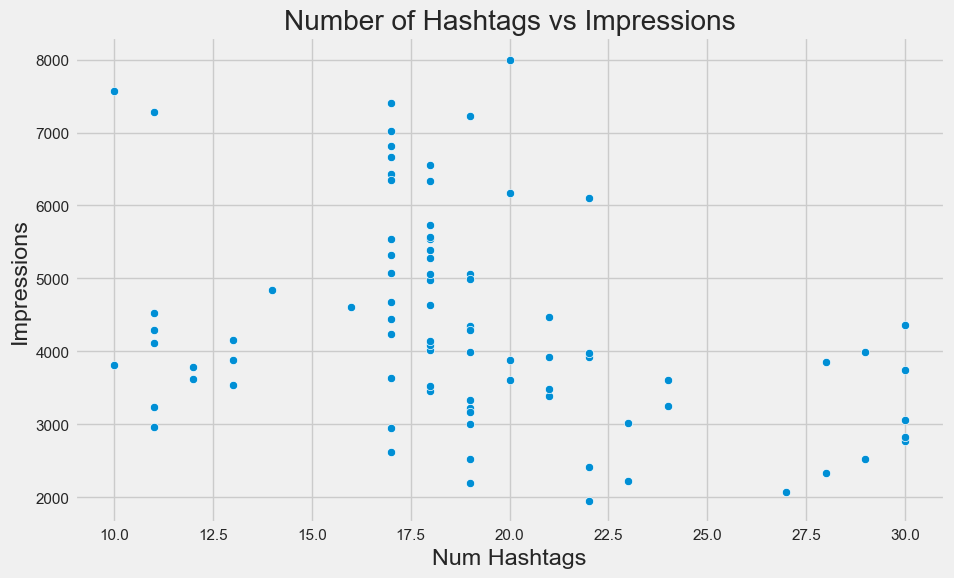

,Num Hashtags,Impressions,Likes,Comments,Shares
Num Hashtags,1.000000,-0.339204,-0.330415,0.001600,0.021616
Impressions,-0.339204,1.000000,0.798755,0.306103,0.313682
Likes,-0.330415,0.798755,1.000000,0.414416,0.492193
Comments,0.001600,0.306103,0.414416,1.000000,0.163418
Shares,0.021616,0.313682,0.492193,0.163418,1.000000


In [67]:

# Count the number of hashtags in each post
df['Num Hashtags'] = df['Hashtags'].apply(lambda x: len(str(x).split('#')) - 1)

# Correlation between number of hashtags and impressions/engagement
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Num Hashtags', y='Impressions', data=df)
plt.title("Number of Hashtags vs Impressions")
plt.show()

df[['Num Hashtags', 'Impressions', 'Likes', 'Comments', 'Shares']].corr()


In this analysis, we examine the relationship between the number of hashtags used in Instagram posts and various engagement metrics, including impressions, likes, comments, and shares.

**1. Scatter Plot: Number of Hashtags vs. Impressions**
The scatter plot above shows how impressions vary with the number of hashtags used. 
 Although impressions can be high with fewer hashtags, there is no strong pattern indicating that more hashtags directly lead to higher impressions. 
In fact, impressions tend to be more spread out, with no clear upward trend as hashtags increase.

**2. Correlation Table Interpretation**
The correlation table below the plot provides insights into how different metrics correlate with the number of hashtags.

**Num Hashtags vs. Impressions:** -0.339
There is a moderate negative correlation, suggesting that an increase in hashtags might slightly reduce the number of impressions. This could indicate that posts with excessive hashtags may not perform as well in reach, possibly due to being perceived as overly promotional or less organic.

**Num Hashtags vs. Likes:** -0.330
Similar to impressions, likes also have a moderate negative correlation with the number of hashtags. This suggests that posts with more hashtags might not receive as many likes, potentially due to a similar perception among viewers.

**Num Hashtags vs. Comments:** 0.002
The very low positive correlation with comments indicates that hashtags do not significantly impact the number of comments on posts. This suggests that hashtag usage neither encourages nor discourages users from commenting.

**Num Hashtags vs. Shares:** 0.022
The weak positive correlation with shares indicates that hashtag usage has little to no impact on whether a post is shared.

**Insights and Recommendations**
-**Avoid Excessive Hashtags:** Given the negative correlation between hashtag count and both impressions and likes, it may be beneficial to use fewer, more targeted hashtags rather than a large number.
Posts with too many hashtags may appear less authentic, which can negatively impact engagement.

-**Focus on Quality Hashtags:** Instead of quantity, focus on using relevant, high-quality hashtags that resonate with your target audience. 
This can help maintain the quality perception of your posts and may lead to better engagement.

-**Experiment with Hashtag Count:** Test different numbers of hashtags across posts to find the optimal balance that maximizes reach without compromising engagement.

**Analyze caption length vs engagement rate**

In [68]:

# Calculate the length of each caption in terms of number of words
df['Caption Length'] = df['Caption'].apply(lambda x: len(str(x).split()))

# Display the first few rows to confirm
df[['Caption', 'Caption Length', 'Engagement Rate']].head()


,Caption,Caption Length,Engagement Rate
0,here are some of the most important data visua...,16,0.044898
1,here are some of the best data science project...,34,0.045421
2,learn how to train a machine learning model an...,20,0.035563
3,heres how you can write a python program to de...,41,0.050795
4,plotting annotations while visualizing your da...,28,0.052423


## Creating an Instagram Reach Prediction Model:
In this section, we will develop a machine learning model to predict the reach of your Instagram posts. 
To ensure the model’s accuracy, we will first divide the data into training and test sets. 
This separation allows us to train the model on one portion of the data and evaluate its performance on another, ensuring its effectiveness in predicting reach for your Instagram content.

In [73]:

# Define features and target variable
x = np.array(Data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(Data['Impressions'])

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Passive Aggressive Regressor model
model = PassiveAggressiveRegressor()
model.fit(x_train, y_train)

# Evaluate the model
score = model.score(x_test, y_test)
print(f"Model Score: {score}")


Model Score: 0.7292834995240776
